# TOI-530

In this notebook, we use *eleanor* to get the raw, corrected and PCA light curves for a target named TOI-530. The target was chosen randomly from the DACE database, to be part of the new dataset required for the project.

It's existence in DACE means that the star already has at least one confirmed exoplanet orbiting it. An exoplanet has also been confimred via the NASA Exoplanet Catalog.


**DACE:** https://dace.unige.ch/dashboard/

**NASA Exoplanet Catalog:** https://exoplanets.nasa.gov/discovery/exoplanet-catalog/

In [1]:
# Connect to Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the *eleanor* pipeline. We need to install every time the notebook gets disconnected from the Google Drive.

In [2]:
pip install eleanor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 63.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.6 MB/s eta 0:00:00
  Created wheel for eleanor: filename=eleanor-2.0.5-py2.py3-none-any.whl size=144466 sha256=1a459d8e6992e21803e547f6fe75a0fcf12a7d6c25563d8ca3c15b845e620

In [3]:
# Import "Image" class to display images in the notebook.
from IPython.display import Image

# Instruct Python to ignore and not display warning messages.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the necessary modules.
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

plt.rcParams['font.size'] = 16   # Set the font size for text.

## Initiating *eleanor.Source*

Choosing the target star and the sector it was observed in. Here we used the name for TOI-530. First, we looked for the targets in sectors 1, 3, 5, 7, 9, 11 and 13. However, it was not found, meaning that it was observed in a different sector, that does not overlap with the ones we chose.

For this reason, we decided to not choose a sector and allow *eleanor* to download the data from the most recent sector the target was observed in. However, Oelkers & Stassun light curves are only available up to (and including) Sector 5, meaning that the OS19 light curve will not be available for TOI-530. Hopefully, the TASOC light curve will exist and we'll be able to compare the *eleanor* light curve with TASOC.

In [13]:
# star = eleanor.Source(name='TOI-530', sector=11)

IndexError: ignored

In [14]:
star = eleanor.Source(name='TOI-530')

Most recent sector available =  69
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 45...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 45 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


Now that everything has been downloaded, we can check the different ID numbers (TIC and Gaia) and coordinates (RA and Dec) from the

cross-checking *eleanor* has done.

In [15]:
star.tic, star.coords, star.gaia

(387690507, (103.41277291666664, 12.881847777777779), 3353218995355814656)

We can also get information on where the target was observed on the TESS CCD cameras.

In [16]:
star.sector, star.camera, star.chip

(45, 1, 1)

We can see from the above cell (and from the data download) that TOI-530 has been observed in Sector 45.

## Making a light curve

We now have everything we need to make a light curve.

In [17]:
# Creating a PCA light curve for the target star.
data = eleanor.TargetData(star, do_pca=True)

The eleanor light curves are tailored to find transits. So, it's trying to minimise the combined differential photometric precision (noise out of transit). We can do three different background subtractions:

1. 1D postcard background: constant value that is calculated for each postcard frame, masking all the stars in that region.
  - data.bkg_type = 'PC_LEVEL' : keyword = data.flux_bkg
2. 1D TPF (target pixel file) background: constant value calculated for each TPF frame, masking all the stars in that region.
  - 1D TPF background : data.bkg_type = 'TPF_LEVEL' : keyword = data.tpf_flux_bkg
3. 2D background: a model background that the developers created and was downloaded when we created the *eleanor.Source* object.
  - data.bkg_type = 'TPF_2D_LEVEL' : keyword = data.bkg_tpf (post_obj.background2d)


An example of a 2D background is shown in the plot below.

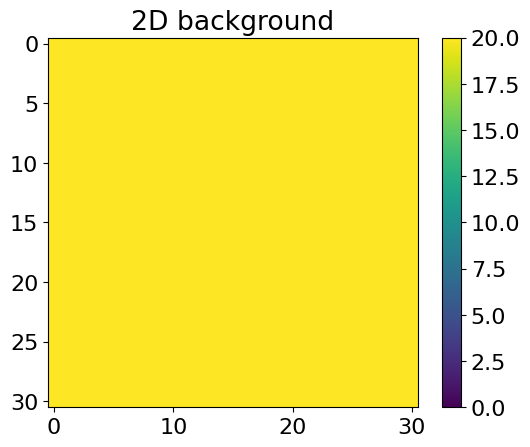

In [28]:
plt.title('2D background')
plt.imshow(data.bkg_tpf[0], vmin=0, vmax=20)
plt.colorbar();

We see that no background can be displayed for this target. We also tried to get a different type of background, by using different keywords (explained above). Those types resulted in a TypeError. We are unsure why this is the case.

Below we can see which background produced the best light curve. The result is "PC_LEVEL", meaning that the 1D postcard background removed the most systematics. This result is slightly confusing, considering the fact that the particular type of background gave us an error previously.


In [19]:
data.bkg_type

'PC_LEVEL'

Below we plot the background flux (energy received per unit area) over time (BJD).



---


**BJD:** Barycentric Julian Date, the Julian Date corrected for differences in the Earth's position with respect to the barycentre of the Solar System. Due to the finite speed of light, the time an astronomical event is observed depends on the changing position of the observer in the Solar System. Before multiple observations can be combined, they must be reduced to a common, fixed, reference location. This correction also depends on the direction to the object or event being timed.

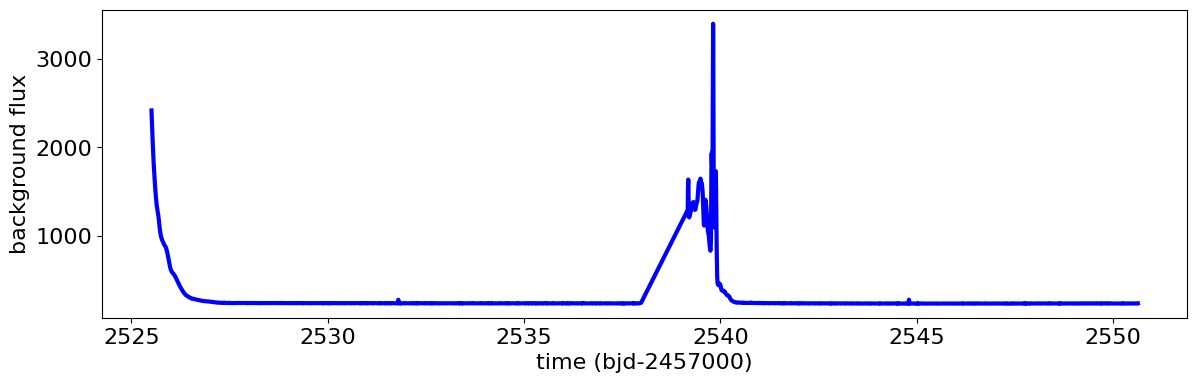

In [29]:
plt.figure(figsize=(14, 4))
plt.plot(data.time, data.post_obj.bkg, 'b', lw=3)        # Changed the line colour from 'w' to 'b' to see it.
plt.xlabel('time (bjd-2457000)')
plt.ylabel('background flux');

*eleanor* also tests an entire suite of apertures. The aperture selected by *eleanor* also minimises CDPP. So, by testing all the different apertures with the different backgrounds, we hope to get the cleanest light curve for transits as possible. The aperture over the selected target is shown below.

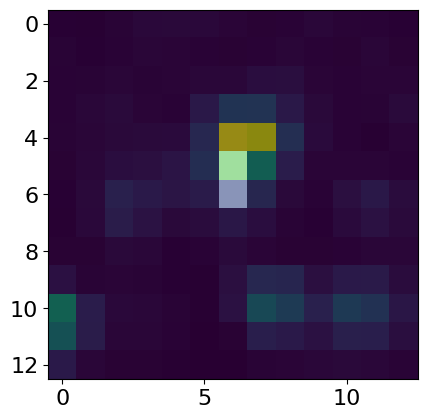

In [30]:
plt.imshow(data.tpf[100])
plt.imshow(data.aperture, alpha=0.4, cmap='Greys_r');

The brighter/more yellow areas show the location of the star. The further away we get from the star the less energy we can receive from those areas. It also appears that there are some stars around our target (slightly bright regions).

We can also use the *eleanor.Visualise* class to visualise the aperture that was chosen. We pass in the data from the *eleanor.TargetData* object and can overplot the contour, set colours, etc.

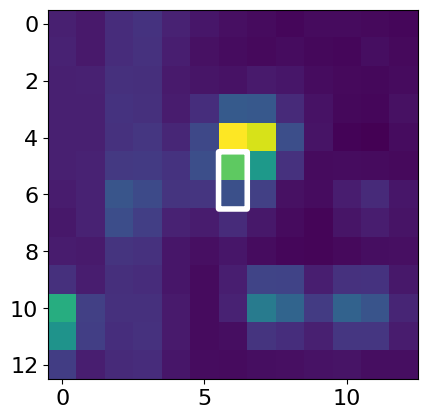

In [31]:
vis = eleanor.Visualize(data)
fig = vis.aperture_contour()
plt.gca().invert_yaxis()

Here we see that the chosen aperture does not overlap with the brightest area. This could be due to the actual signal coming out of each pixel.

One of the most useful tricks is creating a pixel-by-pixel light curve grid, to see if the signal we're seeing in the light curve is from our source or something nearby.

The plot on the left is the TPF (target pixel file) and then the light curve for every pixel of the TPF on the right.

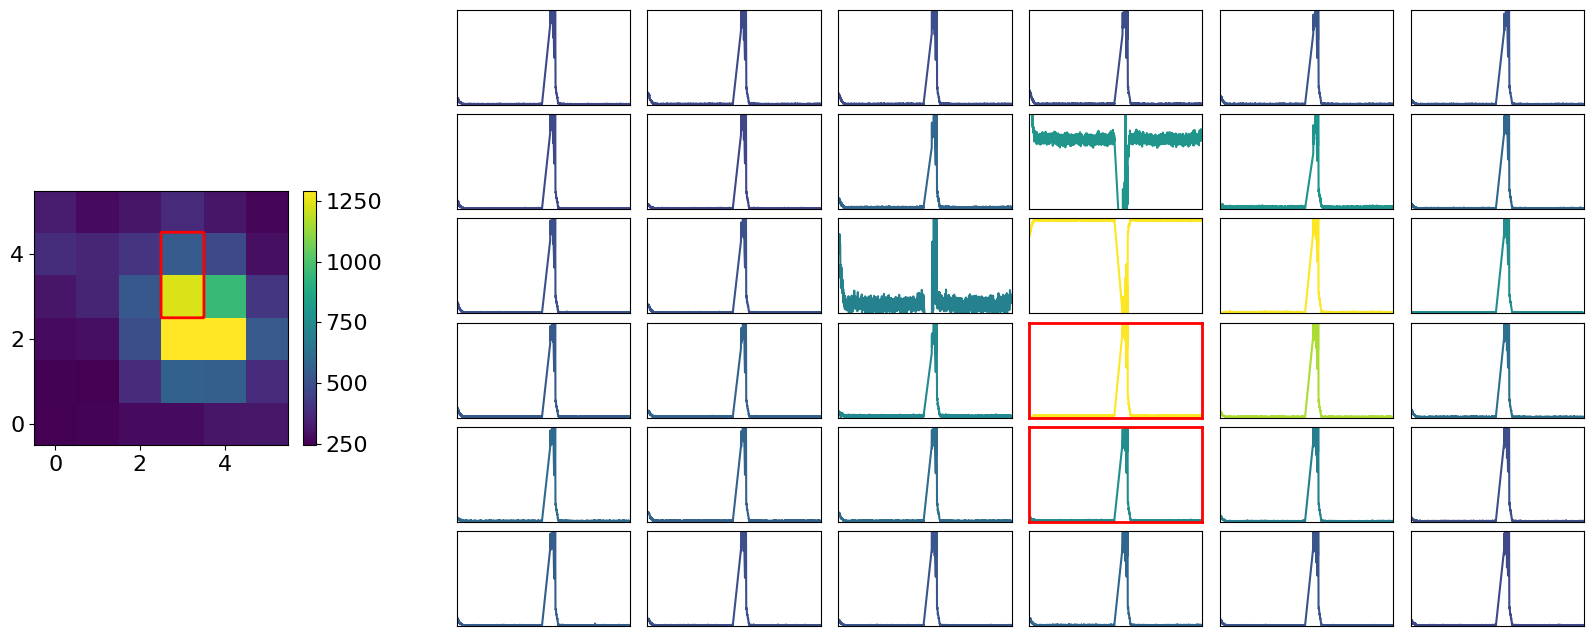

In [33]:
fig = vis.pixel_by_pixel(colrange=[3,9], rowrange=[2,8], color_by_pixel=True)

We can see from the grid that the pixel light curves will most likely not produce good results, as we cannot easily distinguish transits. The aperture seems to have been set to that shape due to the light intensity in those pixels.

## Plotting the light curve

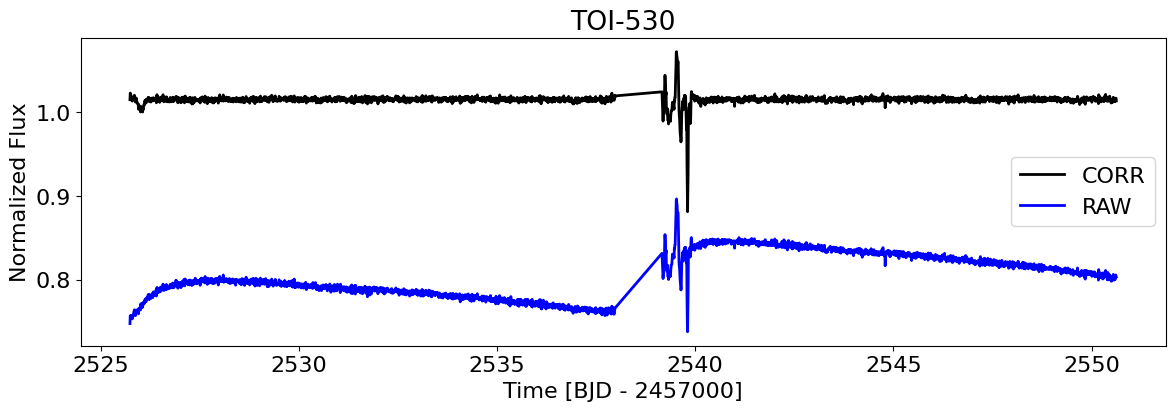

In [37]:
q = data.quality == 0         # Mask bad cadences with the quality flags set by the developers.

plt.figure(figsize=(14,4))    # Set figure size.

#plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) - 0.005, 'b', lw=3, label='RAW')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.015, 'k', lw=2, label='CORR')

# Moved this line of code from the top to get a more consistent legend.
plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) - 0.2, 'b', lw=2, label='RAW')

#plt.ylim(0.98, 1.02)               # This line is used in the tutorial. It just changes the limits of the y-axis.
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('TOI-530')
plt.legend();

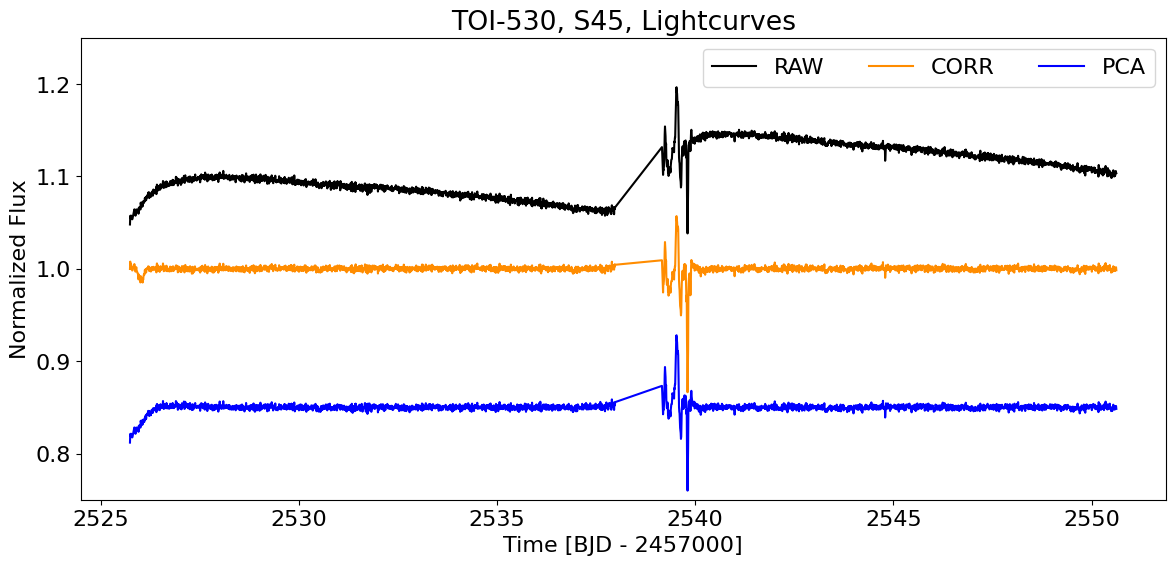

In [44]:
q = data.quality == 0         # Mask bad cadences with the quality flags set by the developers.

plt.figure(figsize=(14,6))    # Set figure size.

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) + 0.1, 'k', label='RAW')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]), 'darkorange', label='CORR')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]) - 0.15, 'b', label='PCA')
#plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylim(0.75, 1.25)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('TOI-530, S45, Lightcurves')
#plt.legend(loc='best');
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.legend(ncol=3);

#plt.xlim(2700, 2702)

There appears to be one transit in the Corrected flux at around time=2526. It does not appear on the Raw flux. Also, no other transits seem to exist.

By calling *eleanor.to_lightkurve()*, we will get a *lightkurve.LightCurve* object. We can specify which flux we want passed into the object.

This is also used to download the light curves from the TASOC and Oelkers & Stassun pipelines, for comparison.


In [45]:
lc = data.to_lightkurve(flux=data.corr_flux)

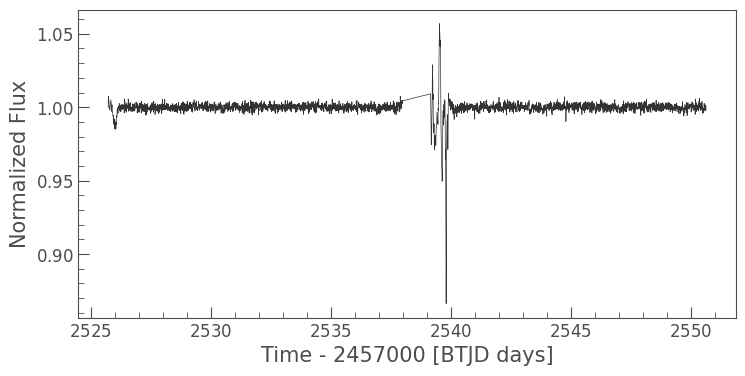

In [46]:
lc.normalize().plot();

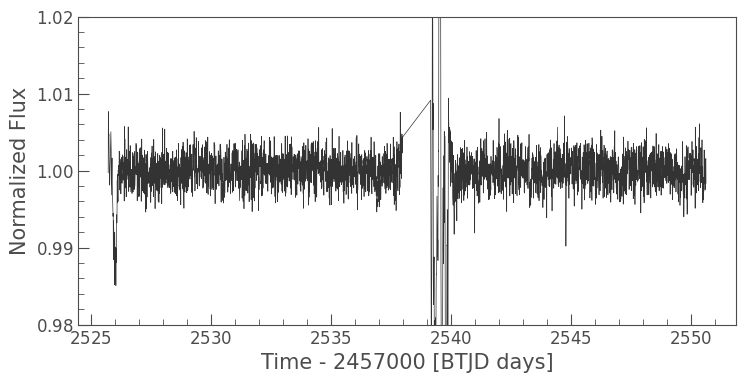

In [47]:
# Setting limits to the y-axis.
lc.normalize().plot()
plt.ylim(0.98, 1.02);

We see from the plot containing all the light curves, as well as the normalised above, that there is a lot of noise in the data and that only one transit is distinguishable.

## Crossmatching

Within *eleanor*, we also have tools to see if our target has a light curve produced by the TASOC team (TESS Asteroseismic Consortium), Oelkers & Stassun difference imaging pipeline, or was observed at a 2-minute cadence.

In [48]:
crossmatch = eleanor.Crossmatch(data)

To check for 2-minute data, we use *lightkurve* behind the scenes.

This cell has been commented out, as it was running for a long time and resulted in a ConnectionError. It is not needed for our comparison of eleanor with TASOC and Oelkers & Stassun.

In [49]:
# crossmatch.two_minute()

ConnectionError: ignored

Because this returns a *lightkurve.SearchResult* object, we can download the data product right from there and go about using the other *lightkurve* tools.


---

To check out the TASOC pipeline, we use *astro query* behind the scenes to get the data products from MAST (Mikulski Archive for Space Telescopes) and plot the light curve. They have their own quality flags so we can use those.

We find that a TASOC light curve does not exist for TOI-530 and, therefore, cannot produce a plot to compare *eleanor* with.

In [50]:
crossmatch.tasoc_lc()

SearchError: ignored

In [51]:
plt.figure(figsize=(14,4))
q = crossmatch.tasoc_pixel_quality == 0      # Can use TASOC quality flags.
plt.plot(crossmatch.tasoc_time[q], crossmatch.tasoc_flux_raw[q], 'k', lw=3)
# plt.ylim(13300,13600)
plt.title('TOI-123 TASOC Light Curve')
plt.xlabel('time [BJD - 2457000]')
plt.ylabel('flux');

AttributeError: ignored

<Figure size 1400x400 with 0 Axes>

Then we check the Oelkers & Stassun light curves (it should be noted these light curves are in magnitudes, which is why they look

upside-down).

We find that an Oelkers & Stassun light curve does not exist either (as expected). Therefore, we cannot use the O&S pipeline to compare *eleanor* with.

In [52]:
crossmatch.oelkers_lc()

HTTPError: ignored

In [53]:
plt.figure(figsize=(14,4))
plt.plot(crossmatch.os_time, crossmatch.os_mag, 'b', lw=3)
plt.title('TOI-123 OS19 Light Curve')
plt.xlabel('time [BJD - 2457000]')
plt.ylabel('magnitude');

AttributeError: ignored

<Figure size 1400x400 with 0 Axes>

## Comparison plot

We can now plot all light curves together and compare.


In [54]:
plt.figure(figsize=(14,8))

e = data.quality == 0

plt.plot(crossmatch.os_time, 10**(-0.4*crossmatch.os_mag)/np.nanmedian(10**(-0.4*crossmatch.os_mag))+0.025, 'k', linewidth=2, label='OS19')

plt.plot(crossmatch.tasoc_time[q], crossmatch.tasoc_flux_raw[q]/np.nanmedian(crossmatch.tasoc_flux_raw[q]), 'royalblue', linewidth=2, label='TASOC')

plt.plot(data.time[e], data.corr_flux[e]/np.nanmedian(data.corr_flux[e])-0.08, 'red', linewidth=2, label='eleanor')


plt.legend(ncol=3, bbox_to_anchor=(0.95, 1))
plt.title('TOI-123, S1, Comparison')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Flux')
plt.ylim(0.9, 1.06);

AttributeError: ignored

<Figure size 1400x800 with 0 Axes>

As neither the TASOC nor the O&S light curves exist, we cannot compare the *eleanor* light curve to conclude whether the pipeline is efficient at extracting correct light curves.

This particular target also included a lot of noise in the data, making it impossible to determine whether a planet (or any object) is orbiting TOI-530. While it is a star with, at least, one confirmed exoplanet, *eleanor* was not sufficient to smooth the data and extract the necessary information.